# Linear Regression with Batch Gradient Descent

The dataset contains a collection of real estate listings in San Luis Obispo county.

The model predict the price given the square footage of the house.


In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


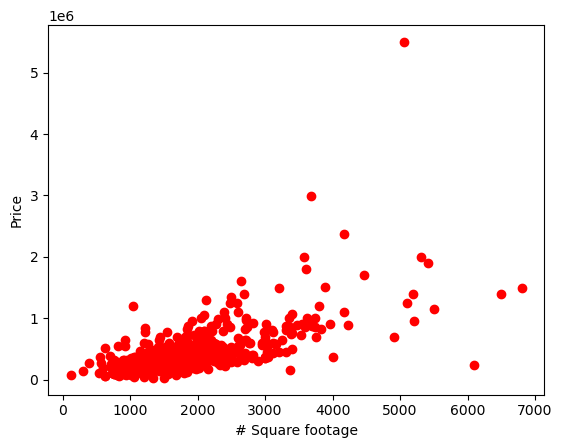

In [4]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [6]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1))
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)
y = y.reshape(len(X),1)

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Complete this code

In [8]:
# Initialize vector w
import numpy as np
np.random.seed(20)
w = np.random.rand(2,1)
w0 = w[0]
w1 = w[1]

# Learning rate
nu = 0.5

# Number of epochs
MAX_EPOCHS = 2000

mse_values = []

for i in range (0, MAX_EPOCHS):
# Compute predictions
    y_pred = np.dot(X, w)

    # Compute the residuals/errors
    errors = y_pred - y

    # Mean Squared Error (MSE)
    mse = (errors ** 2).mean()
    mse_values.append(mse)

    # Gradient of MSE with respect to w
    grad_w = np.dot(X.T, errors) / len(X)

    # Update weights
    w -= nu * grad_w

    # Print progress every 500 epochs for debugging
    if i % 500 == 0:
        print(f"Epoch {i}: MSE = {mse}")

Epoch 0: MSE = 268612143023.93478
Epoch 500: MSE = 67949853043.71415
Epoch 1000: MSE = 67910129292.86535
Epoch 1500: MSE = 67910096891.54995


In [10]:
w = np.array([w0,w1])
print(w)

[[ -79538.70643905]
 [1891037.10264452]]


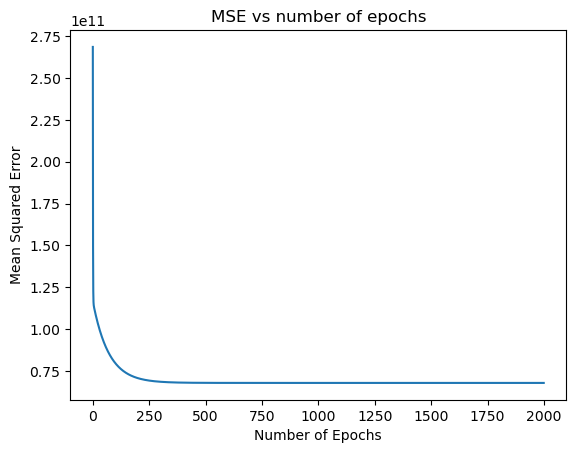

In [12]:
plt.plot(range(MAX_EPOCHS), mse_values)
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs number of epochs')
plt.show()

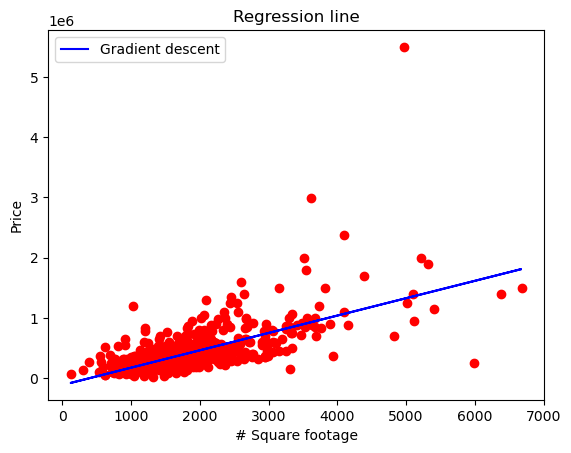

In [14]:
plt.plot(X[:, 1] * (max_min - Xmin) + Xmin, y, 'ro')
plt.plot(X[:, 1] * (max_min - Xmin) + Xmin, np.dot(X, w), 'b', label="Gradient descent")
plt.xlabel('# Square footage')
plt.ylabel('Price')
plt.legend()
plt.title('Regression line')
plt.show()

In [16]:
size = 5000
normalized_size = (size-Xmin) / max_min
print("Predicted price of 5000 square foot house is:",w[0] + (w[1] * normalized_size))

Predicted price of 5000 square foot house is: [1301937.5002833]
